# Impact of product quality, merchant rating and advertisement on the rating of products

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

Nowadays, online shopping has become an inseparable part of life. The reviews of a product can be an important factor in whether customers buy certain. Our project trains a model in which we filter three variables that have a significant impact on rating to predict the rating of a product. The three variables are: the rating of the merchant; whether the merchant uses advertising; and whether the merchant is awarded a badge (if the merchant receives frequent positive feedback from customers, they are awarded a badge). Past experience has taught us that advertising is beneficial in attracting customer spending and feedback, but with the contemporary prevalence of increasingly fragmented information, we wonder if such factors can still have a positive impact on customer feedback. Hopefully with this model online business can use the information to make new decisions about the overall management of the shop.

# Names

- Zhoutianning Pan
- Kelly Huang
- Demeng Zhang
- Duoduo Fu

<a id='research_question'></a>
# Research Question

* Is there a statistically significant relationship between rating of a product and other features of the product, specificallhy whether the sellers use advertisement boosts, the badge product quality, and the merchant rating. How can we utilize these variables to predict a rating of a product.


<a id='background'></a>

## Background & Prior Work

In a fast-paced world of e-commerce, advertising plays a crucial role in promoting products. As competition between businesses intensifies, more and more companies use boosting advertisement within their e-commerce platforms to reach a wider audience and increase their revenue. Traditional advertising, including advertising on TV, radio, promote products to audience that may or may not be interested in the products, which often lacks data support. Platform ads, however, target the consumers who are most likely to be interested in the products using data such as demographics and purchasing history. By promoting inside the platform, companies are looking for a higher return on investment (ROI) for their businesses. According to the research, more than 66.6 billion dollars is invested in online advertisement globally. [Harfoushi]

However, with the increasing number of online advertisements, the crisis of trust between users and advertisements turns out to be a big problem. Many users will want to know more about a product when they see an advertisement when buying it. But many product advertisements are very different from the real thing. This leads to a decrease in customer confidence level and a decrease in satisfaction. [Salameh] According to a survey done in 2021, the response of different generations to advertising is also very different. Many of Gen Z's customers do not find the ads memorable, but rather annoying when they see them while playing videos, music or using search engines. However, the survey was not explicitly described for ads within e-commerce platforms. [Mazumder]

It is important to understand the impact of these advertisements on sales and product rating is desirable before investing into advertising. With this project, we wanted to analyze the data to see if advertising on e-commerce platforms really does increase purchases and positive feedback in an era where online advertising is so commonplace. We wanted to ensure that the company had a sufficient consumer response after investing in advertising.

We found a similar project on Kaggle. Although the topic is different, we can use the same analysis. The authors divided the data into two samples, grouped the individual data together by a certain feature, and then performed a t-test on the data, which we could do by dividing the ratings of products into two groups by whether it placed an ad. [Aksoy] Another project on amazon product ratings uses a correlation matrix, where the author calculates the correlation matrix between product ratings and the different features of the product and then draws it using a heatmap. We can also use the correlation matrix to calculate the correlation between advertising and rating. [Tan]

References :
- 1)[Harfoushi]:Harfoushi , O. (n.d.). Impact of internet advertisement and its features on e-commerce retail ... Retrieved May 4, 2023, from https://www.researchgate.net/publication/273673670_Impact_of_Internet_Advertisement_and_Its_Features_on_E-Commerce_Retail_Sales_Evidence_from_Europe
- 2)[Salameh] :Salameh, A. A., Ijaz, M., Omar, A. B., & Zia ul Haq, H. M. (2022, May 11). Impact of online advertisement on customer satisfaction with the mediating effect of Brand Knowledge. Frontiers. Retrieved May 3, 2023, from https://www.frontiersin.org/articles/10.3389/fpsyg.2022.919656/full
- 3)[Mazumder]: Mazumder, S., Patel, H., & Auxier, B. (2021, November 9). Memorable vs. annoying: How consumers experience ADS on digital platforms. Deloitte Insights. Retrieved May 3, 2023, from https://www2.deloitte.com/xe/en/insights/industry/technology/ad-experience-advertising-effectiveneshttps://www.kaggle.com/code/gorkemaksoy/measurement-problemss.html
- 4)[Aksoy]: https://www.kaggle.com/code/gorkemaksoy/measurement-problems
- 5)[Tan]: https://www.kaggle.com/code/jutansy/amazon-sales-data-data-cleansing-and-exploration

# Hypothesis


We believe that the rating of a product on the platform (E-commerce Wish) has a positive correlation of whether sellers would use advertisement boosts, the badge product quality, and the merchant rating. 


# Dataset(s)

An ideal dataset we want would include all the independent and dependent features in our research question: features presenting if the seller uses an advertisement boost strategy, has good badge product quality and merchant rating. Other variables would be product id, unit price of each product, units of each product sold, types of product, seller id, and order date. We would like around 2000 observations so that we can obtain more general results and implications. Ideally, the data would be collected from an e-commerce platform so that we could work with data in real-life. These data would be stored in a csv, which will help us to do further analysis in Python.

We found a useful dataset on kaggle: https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish. The identifier of product in the dataset are names, which include redundant information and can be complicated to interpret. Hence, we might need to create unique product ids for them to make the dataset clearer.

# Setup
## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import mannwhitneyu
from scipy import stats
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Data Cleaning

* The first step was to read in the csv with pandas. 

* Next, we found the unique number of currencies to examine whether the prices are all in the same currency. 

* We keep the relevant columns, and check the missing values.

In [2]:
## import data
df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

## we want to see if all retail price is in the same currency
unique_currencies = df['currency_buyer'].unique()

if len(unique_currencies) == 1:
    print("All retail prices in the dataset are in the same currency:", unique_currencies[0])
else:
    print("Retail prices in the dataset are in different currencies.")

## delete the irrelevant columns
df = df[['price','units_sold','uses_ad_boosts', 'rating', 'badge_product_quality', 'merchant_rating']]

## take a look at the data
print(f'Numbre of missing vales: {df.isna().sum().sum()}')
df



All retail prices in the dataset are in the same currency: EUR
Numbre of missing vales: 0


,price,units_sold,uses_ad_boosts,rating,badge_product_quality,merchant_rating
0,16.00,100,0,3.76,0,4.128521
1,8.00,20000,1,3.45,0,3.899673
2,8.00,100,0,3.57,0,3.989831
3,8.00,5000,1,4.03,0,4.020435
4,2.72,100,1,3.10,0,4.001588
...,...,...,...,...,...,...
1568,6.00,10000,1,4.08,0,4.224605
1569,2.00,100,1,3.07,0,3.696054
1570,5.00,100,0,3.71,0,3.961905
1571,13.00,100,0,2.50,0,3.774194


# Data Analysis & Results

## Descriptive Analysis

In [3]:
# determine the shape of the data
df.shape

(1573, 6)

In [4]:
# get descriptive statistics for quantitative variables
df.describe()

,price,units_sold,uses_ad_boosts,rating,badge_product_quality,merchant_rating
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,8.325372,4339.005086,0.432931,3.820896,0.074380,4.032345
std,3.932030,9356.539302,0.495639,0.515374,0.262472,0.204768
min,1.000000,1.000000,0.000000,1.000000,0.000000,2.333333
25%,5.810000,100.000000,0.000000,3.550000,0.000000,3.917353
50%,8.000000,1000.000000,0.000000,3.850000,0.000000,4.040650
75%,11.000000,5000.000000,1.000000,4.110000,0.000000,4.161797
max,49.000000,100000.000000,1.000000,5.000000,1.000000,5.000000


## Exploratory Data Analysis

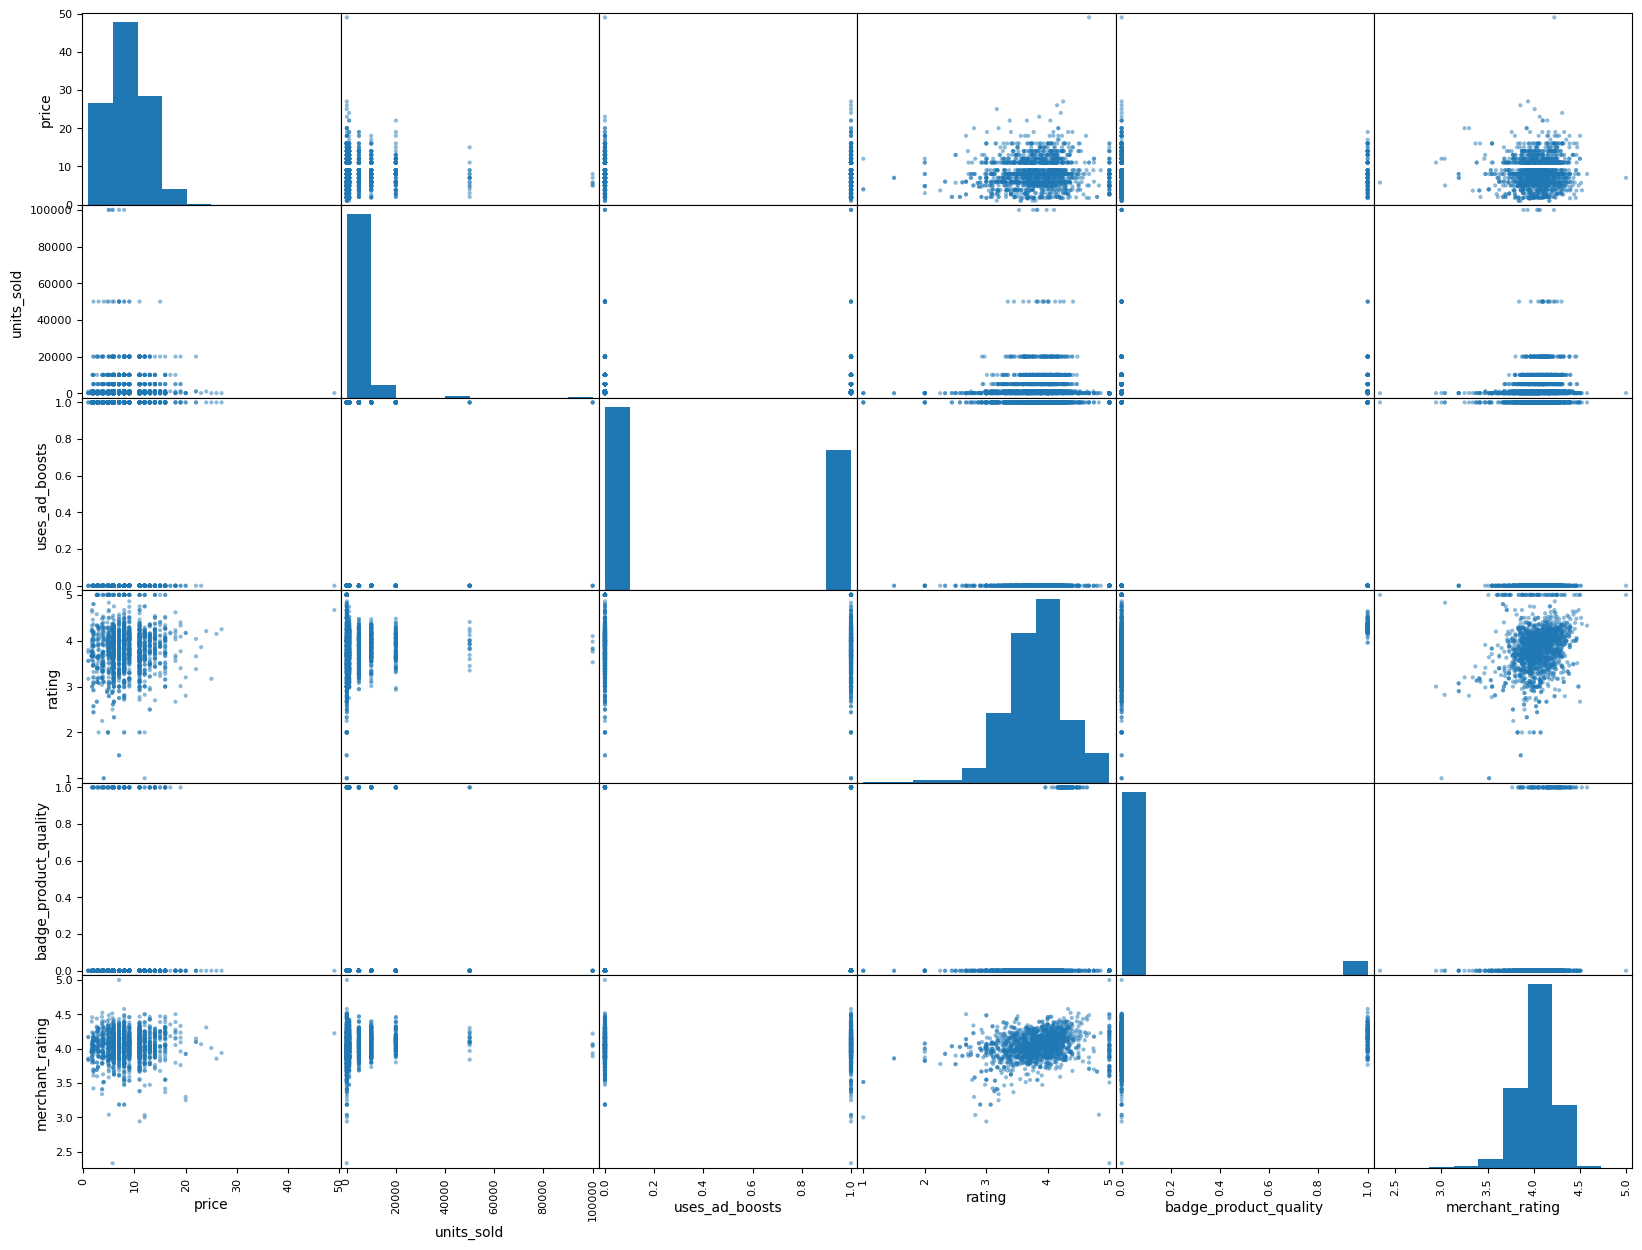

In [5]:
# first look at the scatter matrix
scatter = pd.plotting.scatter_matrix(df, figsize=(20, 15))

From this scatter plot we can see there is a positive relation between rating and merchant_rating.

[Text(0.5, 1.0, 'Distribution of uses_ad_boosts')]

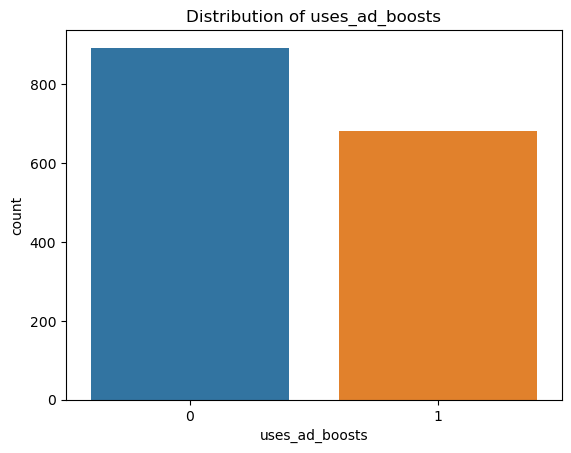

In [6]:
# countplot of 'uses_ad_boost'
sns.set
sns.countplot(data=df, x='uses_ad_boosts').set(title= 'Distribution of uses_ad_boosts')

The number of product with ad boosts is less than the number of product without ad boosts, but the overall difference is acceptable in order to develop our analysis between this binary variable and the rating.

[Text(0.5, 1.0, 'Distribution of rating')]

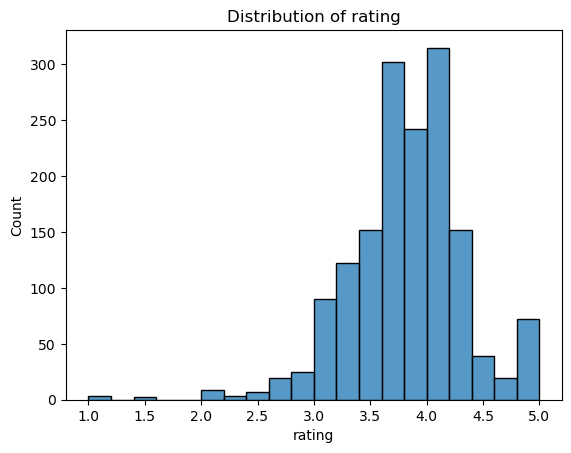

In [7]:
# distribution of 'rating'
sns.histplot(data=df, x='rating', bins=20).set(title= 'Distribution of rating')

We can see rating has a normal distribution, and all the values are in the range of 1 to 5 without outliers.

[Text(0.5, 1.0, 'Distribution of badge_product_quality')]

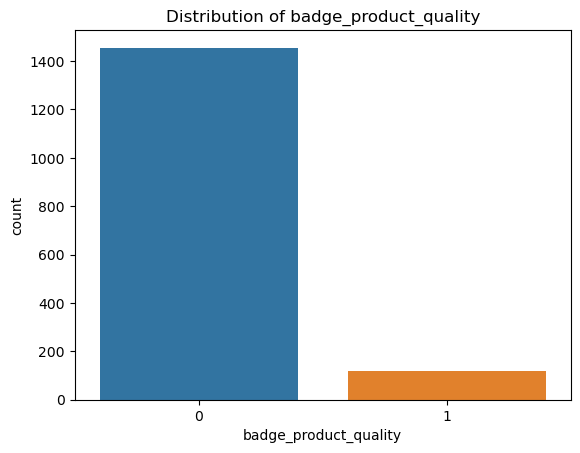

In [8]:
# countplot of 'badge_product_quality'
sns.countplot(data=df, x='badge_product_quality').set(title= 'Distribution of badge_product_quality')

We are surprised by the count difference of badge_product_quality dummy values, and we believe there would be some effect of this binary varibale to the rating of a product.

[Text(0.5, 1.0, 'Distribution of merchant_rating')]

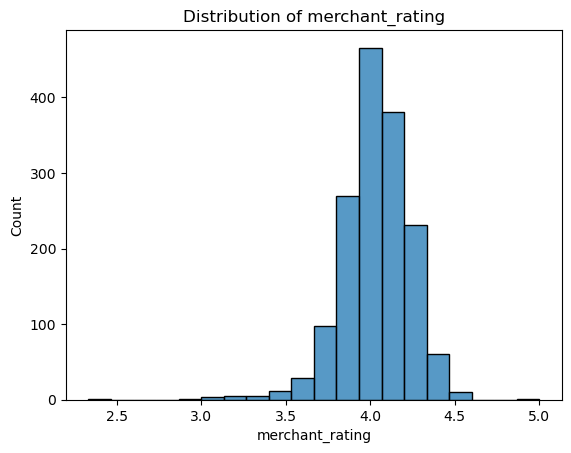

In [9]:
# distribution of 'merchant_rating'
sns.histplot(data=df, x='merchant_rating', bins=20).set(title= 'Distribution of merchant_rating')

### Since we are interested in the relationship of rating of profuct and the merchant rating, since they are both "rating" we can compare thier distributions.

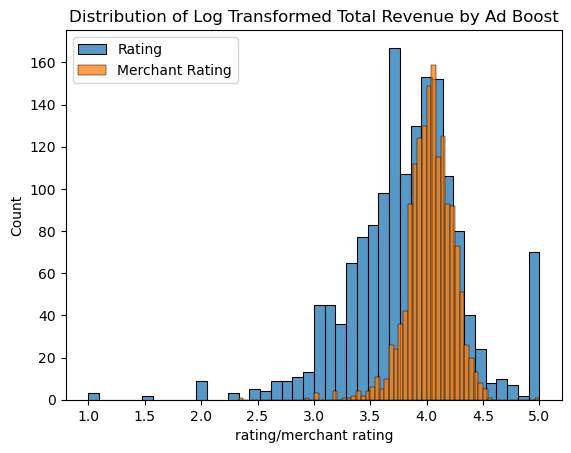

In [10]:
sns.histplot(df['rating'], label='Rating')
sns.histplot(df['merchant_rating'], label='Merchant Rating')
plt.xlabel('rating/merchant rating')
plt.ylabel('Count')
plt.title('Distribution of Log Transformed Total Revenue by Ad Boost')
plt.legend()
plt.show()

We observed that the shape of these two distributions are very different but they have similar means, so we predict there would be a relation between them.

#### Linear Regression with single feature

##### Rating and Uses_ad_boosts
First, we will plot the relationship between the two variables to observe the rough. Next, we will use linear regression to determine the influence of uses_ad_boosts on the rating of a product. 

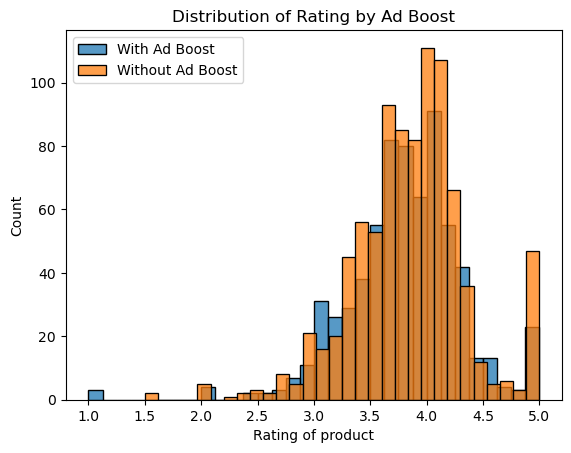

In [11]:
sns.histplot(df[df['uses_ad_boosts'] == 1]['rating'], label='With Ad Boost')
sns.histplot(df[df['uses_ad_boosts'] == 0]['rating'], label='Without Ad Boost')
plt.xlabel('Rating of product')
plt.ylabel('Count')
plt.title('Distribution of Rating by Ad Boost')
plt.legend()
plt.show()

In [12]:
outcome_1, predictors_1 = patsy.dmatrices('rating ~ uses_ad_boosts', data=df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.845
Date:                Wed, 14 Jun 2023   Prob (F-statistic):             0.0501
Time:                        22:19:57   Log-Likelihood:                -1186.9
No. Observations:                1573   AIC:                             2378.
Df Residuals:                    1571   BIC:                             2388.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8431      0.017    222.

The p-value is 0.05, which is smaller than out alpha value - 0.1. This means **there is a significant relationship between  uses_ads_boosts and rating**. From the coefficient -0.0514, we learn that if the seller pays to boost the product within the platfrom, the rating of the product will be negatively impacted.

##### Rating and merchant_rating

Next, we want to investigate the relationship between the rating of product and rating of merchant.

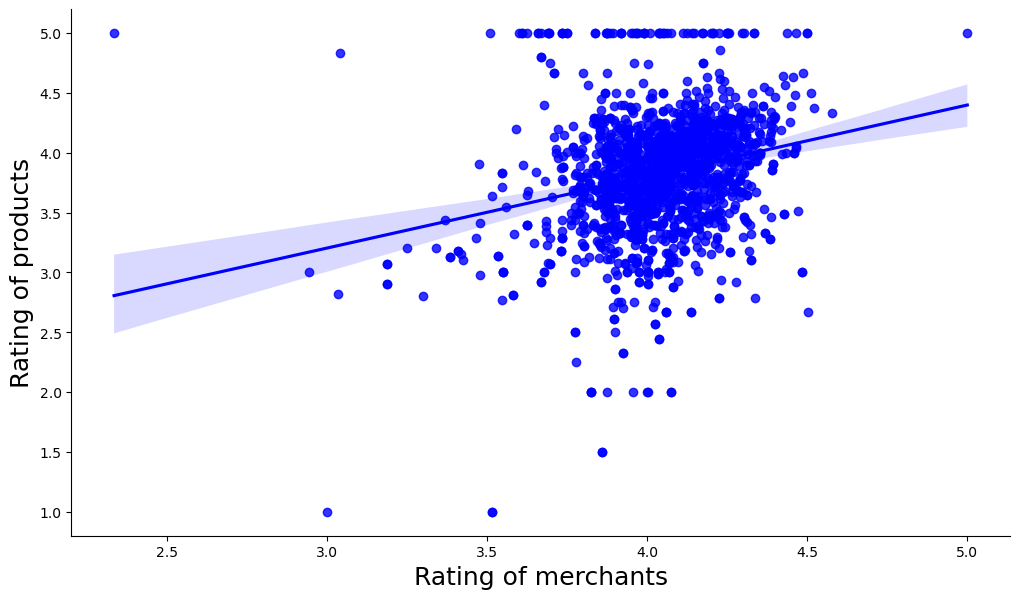

In [13]:
# plot relationship between the rating and merchant_rating 
sns.lmplot(y = 'rating',
           x = 'merchant_rating',
           data = df, 
           fit_reg = True, 
           height = 6,
           aspect = 1.7, 
           line_kws={'color': 'blue'},
           scatter_kws={'color': 'blue'})
plt.ylabel('Rating of products', size=18)
plt.xlabel('Rating of merchants', size=18)
plt.title('');

In [14]:
outcome_2, predictors_2 = patsy.dmatrices('rating ~ merchant_rating', data=df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     93.75
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.42e-21
Time:                        22:19:57   Log-Likelihood:                -1143.2
No. Observations:                1573   AIC:                             2290.
Df Residuals:                    1571   BIC:                             2301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.4125      0.249     

Since the p-value equals to 0.000, which is smaller than our alpha value, we conclude that **there is a significant relationship between rating of products and rating of merchants**. The variable merchant_rating has a coefficient of 0.5973. This indicates when there is one unit increase in merchant_rating, rating will increase by 0.5973. Thus, merchant_rating has a positive influence on rating.

##### Rating and badge_product_quality

Then we continue to explore the relationship between rating and whether the merchant has been awarded the Badge of good product quality. In other words, it showcases whether many buyers consistently gave good evaluations to the merchant.

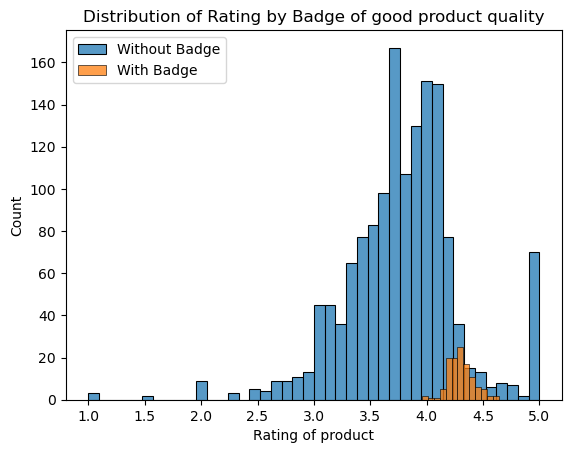

In [15]:
merchants_with_badge = df[df['badge_product_quality'] == 1]
merchants_without_badge = df[df['badge_product_quality'] == 0]
sns.histplot(merchants_without_badge['rating'], label='Without Badge')
sns.histplot(merchants_with_badge['rating'], label='With Badge')
plt.xlabel('Rating of product')
plt.ylabel('Count')
plt.title('Distribution of Rating by Badge of good product quality')
plt.legend()
plt.show()

In [16]:
outcome_3, predictors_3 = patsy.dmatrices('rating ~ badge_product_quality', data=df)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     118.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.46e-26
Time:                        22:19:58   Log-Likelihood:                -1131.8
No. Observations:                1573   AIC:                             2268.
Df Residuals:                    1571   BIC:                             2278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.78

The p-value of the variable badge_product_quality is 0.000, which is smaller than our alpha. Hence, **there exists a siginificant relationship between rating and badge_product_quality**. The coefficient 0.5191 reflects that increase of badge_product_quality from 0 to 1 will lead to 0.5191 increase in rating. It is worth mentioning that as badge_product_quality is a binary variable, one unit increase in badge_product_quality can be interpreted as a merchant receives the badge of good product quality from the platform.

#### Linear Regression with combined features

##### Rating and Uses_ad_boosts, merchant_rating, badge_product_quality
From the above investigation, we found out that uses_ad_boosts, merchant_rating, and badge_product_quality all have a siginificant relationhsip with rating. Therefore, we decided to build an OLS linear model with the three features combined together. 

In [17]:
outcome_4, predictors_4 = patsy.dmatrices('rating ~ badge_product_quality + merchant_rating + uses_ad_boosts', data=df)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     63.41
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.07e-38
Time:                        22:19:58   Log-Likelihood:                -1098.8
No. Observations:                1573   AIC:                             2206.
Df Residuals:                    1569   BIC:                             2227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.85

This model has the highest R-squared value amongst all. This means this model best explains the data set as compared to the previous ones. Hence, adding more features helped account for more variance in our data set. Overall, we conclude that the model which has the most significant effect is the OLS model with uses_ad_boosts, merchant_rating, and badge_product_quality.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
# fit a linear regression model with our interested features and rating of the product in training dataset
lr = LinearRegression()
X = df[['badge_product_quality', 'merchant_rating', 'uses_ad_boosts']]
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
# display the coefficient of the 
lr.coef_

array([ 0.45429705,  0.47523592, -0.02223545])

In [21]:
# display the R square of the training dataset
lr.score(X_train, y_train)

0.11324041958179865

In [22]:
# evaluate our model's performance on test dataset
lr.fit(X_test, y_test)
lr.coef_

array([ 0.40586102,  0.51606632, -0.12324578])

In [23]:
# display the R square of the test dataset
lr.score(X_test, y_test)

0.100301178345788

For the linear regression model trained with the trainning dataset, we get the coefficients and R square similar to our previos inferece results, although the R square is a bit lower but this is in our expectation. The performance of this model on both training and testing dataset is not so good because of the low R square. Since only ten percent of the dataset can be explianed by the model, we do not think we can predict the rating of the product well with this model.

# Ethics & Privacy

There is not any privacy violation issues in our project because we are not collecting any personal data. But the data we choose might have some biases because it has self-rating data. Also, it might have some sellers use some way to make fake data, but we believe it is just rarely of them. The data is publicly available online and all comes from different sources, and those data were the real data from Wish.com, so as the platform itself has a policy about the seller so we think it would not affect the analysis we made.
However, our reseach result may cause companies do more advertisements to boost thier product which may bring confusion and inconvinience to consumers when they selecting products. Also, there may be a price range which would perform the best sales revenue, and companies may transform thier product to fit the specific price range. This may leave less choice for thouse consumers who prefer products in other price ranges.

# Conclusion & Discussion

In this project we used linear regression to test whether there was a significant relationship between our three selected variables and item ratings. P value for all our results was less than the alpha value we set, which means that a significant relationship does exist. However, it is important to note that the coefficient for this factor is negative, which indicates that the use of advertising has a negative effect on the rating. However, when we combine all three variables in our final prediction model, we can see that the r squared value is low. A low R-squared value in a linear regression model suggests that the model does not explain a large proportion of the variance in the dependent variable. Therefore the prediction is not accurate.

Overall, we have successfully verified the impact of these three factors on product rating. What is surprising is the negative impact of advertising on product rating. We believe that advertising can sometimes increase customer expectations of a product. If the product doesn’t match their expectation, they are more likely to leave a negative review. Ad boost campaigns can sometimes target a broader audience, including customers who may not have a genuine interest or need for the specific product. As a result, when these customers purchase the product based on the ad but find it irrelevant to their needs, they may give it a lower rating. The overall rating of merchant is also closely related to the rating of the product. A high overall rating for a merchant indicates a positive reputation. Customers are more likely to trust a merchant with a good reputation. Some customers will filter out low rated merchants when purchasing products. If a shop has a high overall rating, more customers will choose that shop. When the total number of customers increases, the number of positive product reviews will also increase in relative terms. We also see a strong positive correlation between good product quality badges and project ratings. This indicates that customers place a high value on product quality. Our data is for summer clothing, which suggests that customers focus on quality when purchasing clothing. It can be concluded that when making a business decision, the quality of the product and the overall image of the shop is a key focus to be enhanced. However, when placing ads, shops need to be aware that not all ads will increase product reviews. You need to target your ads precisely to the people who have interest in the product.

It is important to note that when we combine these three factors into our prediction model, the predictions are not very accurate. This is because there is a lot of limitation in our project. The overall landscape of onlineshopping is complex and dynamic. Our data is all about summer clothing sales. Customer preferences, trends, and market conditions can change rapidly, which may impact the predictive power of our model. Every customer has unique preferences and expectations, making it challenging to accurately predict individual ratings based on aggregated data.

# Team Contributions

- Duoduo Fu: Background, data cleaning, overview, conclusion
- Zhoutianning Pan: Data analysis (EDA, prediction), data cleaning, ethics
- Kelly Huang: Data analysis (inference), data cleaning
- Demeng Zhang: Ethics